In [26]:
#Варіант21
from matplotlib import pyplot as plt
import numpy 
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
#Завантаження данних в data_list з файлу А21.txt
way = "C:\\Users\\myshu\\Downloads\\Лабораторні2021\\A21.txt"
A_list = []
with open(way, 'r') as file:
    for line in file:
        A_list.append(line.split(","))
data_list = []
n = 12
i = 0
while i < n:
    temp_list = []
    for el in A_list:
        temp_list.append(float(el[i]))
    data_list.append(temp_list)
    i = i + 1

In [27]:
#Знаходимо середнє, дисперсію, та перевіряємо гіпотезу про закон розподілу для кожної вибірки
i = 0
while i < 12:
    print("Вибірка №" + str(i+1) + " Середнє - " + str(numpy.mean(data_list[i])) + ". Дисперсія - " + str(numpy.var(data_list[i])) + ". Тест Шапіро - " + str(stats.shapiro(data_list[i])))
    i = i + 1

Вибірка №1 Середнє - 58.751448078680006. Дисперсія - 48851.668528802. Тест Шапіро - ShapiroResult(statistic=0.5852363109588623, pvalue=0.0)
Вибірка №2 Середнє - 34.44998188144. Дисперсія - 17958.322083128136. Тест Шапіро - ShapiroResult(statistic=0.6541639566421509, pvalue=0.0)
Вибірка №3 Середнє - -6.9111069688599995. Дисперсія - 16032.305604469628. Тест Шапіро - ShapiroResult(statistic=0.6685104370117188, pvalue=0.0)
Вибірка №4 Середнє - -46.8564258586. Дисперсія - 29812.61126736681. Тест Шапіро - ShapiroResult(statistic=0.5836584568023682, pvalue=0.0)
Вибірка №5 Середнє - 31.7513881014. Дисперсія - 27479.73680757442. Тест Шапіро - ShapiroResult(statistic=0.6139894723892212, pvalue=0.0)
Вибірка №6 Середнє - 16.171670826779998. Дисперсія - 5213.569070722561. Тест Шапіро - ShapiroResult(statistic=0.6835596561431885, pvalue=0.0)
Вибірка №7 Середнє - -34.55152699066. Дисперсія - 19701.260256106078. Тест Шапіро - ShapiroResult(statistic=0.6723952889442444, pvalue=0.0)
Вибірка №8 Середнє -

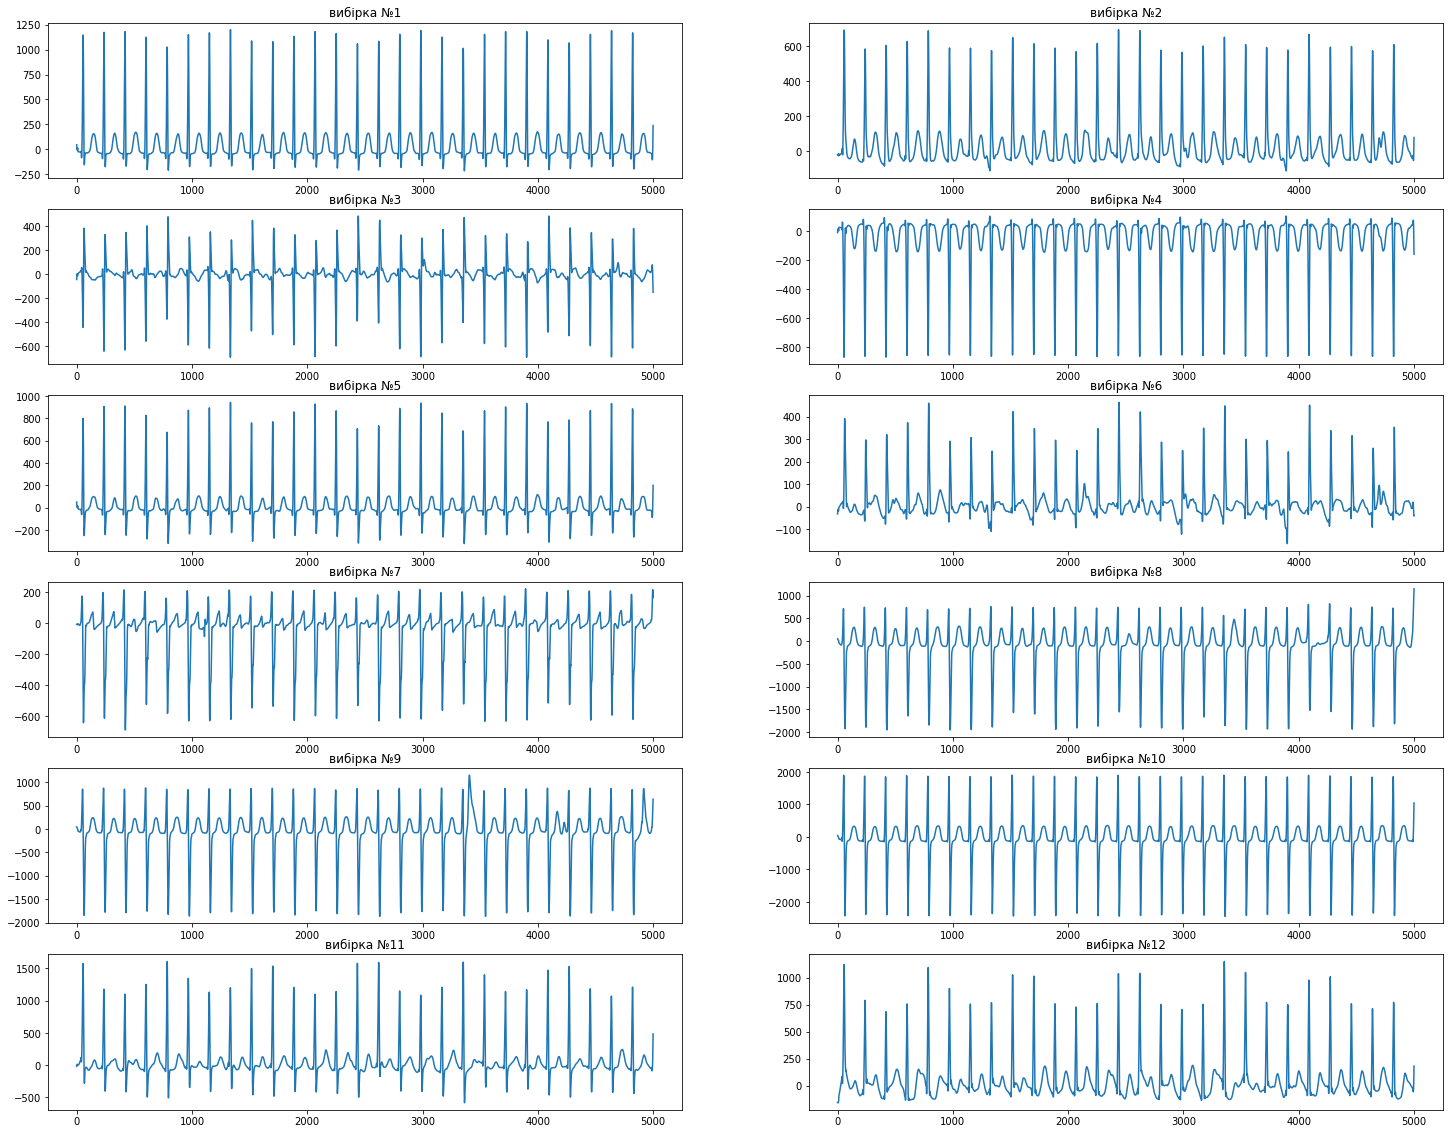

In [28]:
fig, ax = plt.subplots(6,2,figsize=(25,20))
k = 0
for row in ax:
    for col in row:
        col.plot(data_list[k])
        col.set_title('вибірка №'+str(k+1))
        k += 1 
#Графіки розподілів

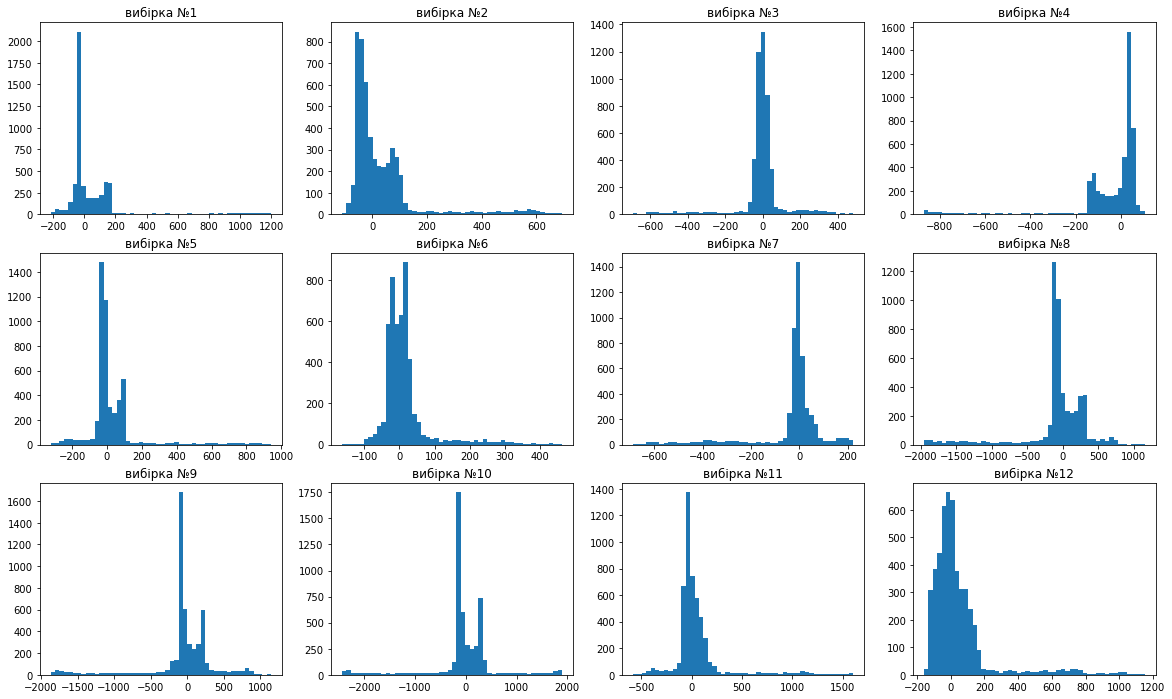

In [29]:
fig, ax = plt.subplots(3,4,figsize=(20,12))
k = 0
for row in ax:
    for col in row:
        col.hist(data_list[k],bins=50)
        col.set_title('вибірка №'+str(k+1))
        k += 1 
#Гістограми вибірок

In [30]:
#Перевірка нормальності данних за допомогою тесту Шапіро-Уілкі
shap = stats.shapiro(data_list[1])
shap

ShapiroResult(statistic=0.6541639566421509, pvalue=0.0)

In [31]:
#Перевірка рівності дисперсій за допомогою тесту Левена
levene = stats.levene(data_list[0], data_list[1], data_list[2], data_list[3], data_list[4], data_list[5], data_list[6], data_list[7], data_list[8],data_list[9], data_list[10], data_list[11])
levene

LeveneResult(statistic=672.4074135247248, pvalue=0.0)

In [32]:
#Нормалізуємо вибірки 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_list)

In [33]:
#Перевіряємо отримані вибірки на нормальність розподілу
for el in scaled_data:
    print(stats.shapiro(el))

ShapiroResult(statistic=0.9734950065612793, pvalue=1.7270429206122886e-29)
ShapiroResult(statistic=0.9889563322067261, pvalue=2.3836654331848046e-19)
ShapiroResult(statistic=0.9045220613479614, pvalue=0.0)
ShapiroResult(statistic=0.8853559494018555, pvalue=0.0)
ShapiroResult(statistic=0.9817341566085815, pvalue=6.711620693011316e-25)
ShapiroResult(statistic=0.9354064464569092, pvalue=3.8563733738218966e-42)
ShapiroResult(statistic=0.9796879291534424, pvalue=3.628611636299343e-26)
ShapiroResult(statistic=0.868461012840271, pvalue=0.0)
ShapiroResult(statistic=0.9157973527908325, pvalue=0.0)
ShapiroResult(statistic=0.8152581453323364, pvalue=0.0)
ShapiroResult(statistic=0.9872452020645142, pvalue=7.324693209886296e-21)
ShapiroResult(statistic=0.9943629503250122, pvalue=4.244774291176784e-13)


In [34]:
#Відкидаємо гіпотезу про нормальний закон розподілу
#Перевіряємо отримані вибірки на рівність дисрерсій
levene = stats.levene(scaled_data[0], scaled_data[1], scaled_data[2], scaled_data[3], scaled_data[4], scaled_data[5], scaled_data[6], scaled_data[7], scaled_data[8],scaled_data[9], scaled_data[10], scaled_data[11])
levene

LeveneResult(statistic=1535.4752613468313, pvalue=0.0)

In [35]:
#Відкидаємо гіпотезу про рівність дисперсій
#Нормалізація не допомогла
#Оскільки гіпотези про рівність дисперсій і нормальність розподіу були відхилені використовується непараметричний тест Крускала-Уолліса
kruskal = stats.kruskal(scaled_data[0], scaled_data[1], scaled_data[2], scaled_data[3], scaled_data[4], scaled_data[5], scaled_data[6], scaled_data[7], scaled_data[8],scaled_data[9], scaled_data[10], scaled_data[11])
kruskal

KruskalResult(statistic=2813.751965525793, pvalue=0.0)

In [36]:
#Фактор А не є значущим

In [37]:
#Оскільки вибірки не є нормально розподіленими і мають різні дисперсії використовуємо непараметричний тест Фрідмана
#Тест фрідмана для фактора А
fridman = stats.friedmanchisquare(data_list[0], data_list[1], data_list[2], data_list[3], data_list[4], data_list[5], data_list[6], data_list[7], data_list[8],data_list[9], data_list[10], data_list[11])
print(fridman)
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
#Тест фрідмана для фактора В
for el in data_list:
    list1 = list1 + el[0:999]
for el in data_list:
    list2 = list2 + el[1000:1999]
for el in data_list:
    list3 = list3 + el[2000:2999]
for el in data_list:
    list4 = list4 + el[3000:3999]
for el in data_list:
    list5 = list5 + el[4000:4999]
fridman = stats.friedmanchisquare(list1, list2, list3, list4, list5)
print(fridman)

FriedmanchisquareResult(statistic=2408.4188923076726, pvalue=0.0)
FriedmanchisquareResult(statistic=163.69742824014898, pvalue=2.354186576155599e-34)


In [38]:
#Вплив фактору А незначний, якщо фактори А і В незалежні
#Вплив фактору В незначний, якщо фактори А і В незалежні